Dragon curve example from the [L-systems](../../topics/geometry/lsystems.ipynb) topic notebook in ``examples/topics/geometry``.

Most examples work across multiple plotting backends, this example is also available for:
* [Matplotlib - dragon_curve](../matplotlib/dragon_curve.ipynb)


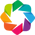

In [1]:
import holoviews as hv
import numpy as np
hv.extension('bokeh')

## L-system definition

The following class is a simplified version of the approach used in the [L-systems](../../topics/geometry/lsystems.ipynb) notebook, made specifically for plotting the [Dragon Curve](https://en.wikipedia.org/wiki/Dragon_curve).

In [2]:
class DragonCurve(object):
    "L-system agent that follows rules to generate the Dragon Curve"
    
    initial ='FX'
    productions = {'X':'X+YF+', 'Y':'-FX-Y'}
    dragon_rules = {'F': lambda t,d,a: t.forward(d),
                    'B': lambda t,d,a: t.back(d),
                    '+': lambda t,d,a: t.rotate(-a),
                    '-': lambda t,d,a: t.rotate(a),
                    'X':lambda t,d,a: None,
                    'Y':lambda t,d,a: None }
    
    def __init__(self, x=0,y=0, iterations=1):
        self.heading = 0
        self.distance = 5
        self.angle = 90
        self.x, self.y = x,y
        self.trace = [(self.x, self.y)]
        self.process(self.expand(iterations), self.distance, self.angle)
        
    def process(self, instructions, distance, angle):
        for i in instructions:          
            self.dragon_rules[i](self, distance, angle)
        
    def expand(self, iterations):
        "Expand an initial symbol with the given production rules"
        expansion = self.initial
        
        for i in range(iterations):
            intermediate = ""
            for ch in expansion:
                intermediate = intermediate + self.productions.get(ch,ch)
            expansion = intermediate
        return expansion

    def forward(self, distance):
        self.x += np.cos(2*np.pi * self.heading/360.0)
        self.y += np.sin(2*np.pi * self.heading/360.0)
        self.trace.append((self.x,self.y))
    
    def rotate(self, angle):
        self.heading += angle
        
    def back(self, distance):
        self.heading += 180
        self.forward(distance)
        self.heading += 180
        
    @property
    def path(self):
        return hv.Path([self.trace])

## Plot

In [3]:
%%opts Path {+framewise} [xaxis=None yaxis=None title_format=''] (color='black' line_width=1)

def pad_extents(path):
    "Add 5% padding around the path"
    minx, maxx = path.range('x')
    miny, maxy = path.range('y')
    xpadding = ((maxx-minx) * 0.1)/2
    ypadding = ((maxy-miny) * 0.1)/2
    path.extents = (minx-xpadding, miny-ypadding, maxx+xpadding, maxy+ypadding)
    return path
    
hmap = hv.HoloMap(kdims='Iteration')
for i in range(7,17):
    path = DragonCurve(-200, 0, i).path
    hmap[i] = pad_extents(path)
hmap

:HoloMap   [Iteration]
   :Path   [x,y]